In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

In [12]:
def plot_completeness_analysis(base_file, probabilities, abs_value=True):
    """
    Plot completeness scores across different probabilities.
    
    Parameters:
    -----------
    base_file : str
        Path to a base completeness results file (e.g., 'results/completeness/completeness_BABA_T=0_type=random_num_runs=20_prob=0.1.json')
    probabilities : list
        List of probability values to analyze
    abs_value : bool
        If True, take absolute value of completeness scores
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    means = []
    variances = []
    maxima = []
    
    # Process each probability
    for prob in probabilities:
        # Replace the probability in the filename
        file_path = re.sub(r'prob=x', f'prob={prob}', base_file)
        
        try:
            # Load the JSON file
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            # Extract completeness scores
            completeness_scores = []
            for exp in data.keys():
                if exp not in ["largest difference found","ablation_set_type","name"]:
                    completeness_scores.append(data[exp]['completeness_score'])
            
            if abs_value:
                completeness_scores = [abs(score) for score in completeness_scores]
            
            # Compute statistics
            if completeness_scores:
                means.append(np.mean(completeness_scores))
                variances.append(np.var(completeness_scores))
                maxima.append(np.max(completeness_scores))
            else:
                print(f"Warning: No completeness scores found in {file_path}")
                means.append(np.nan)
                variances.append(np.nan)
                maxima.append(np.nan)
                
        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}")
            means.append(np.nan)
            variances.append(np.nan)
            maxima.append(np.nan)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            means.append(np.nan)
            variances.append(np.nan)
            maxima.append(np.nan)
    
    # Convert to numpy arrays
    probabilities = np.array(probabilities)
    means = np.array(means)
    variances = np.array(variances)
    maxima = np.array(maxima)
    std_devs = np.sqrt(variances)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot mean with variance as shaded region
    ax.plot(probabilities, means, 'darkorange', linewidth=2, label='Mean', marker='o')
    ax.fill_between(probabilities, 
                     means - std_devs, 
                     means + std_devs, 
                     alpha=0.3, 
                     color='orange', 
                     label='Mean ± Std Dev')
    
    # Plot maximum
    ax.plot(probabilities, maxima, 'r-', linewidth=2, label='Maximum', marker='s')
    
    # Customize plot
    ax.set_xlabel('Probability', fontsize=12)
    ax.set_ylabel('Incompleteness Score' + (' (Absolute Value)' if abs_value else ''), fontsize=12)
    ax.set_title('Completeness Analysis Across Probabilities', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    return fig, ax

## Example Usage

Use the function to plot completeness scores for different probabilities.

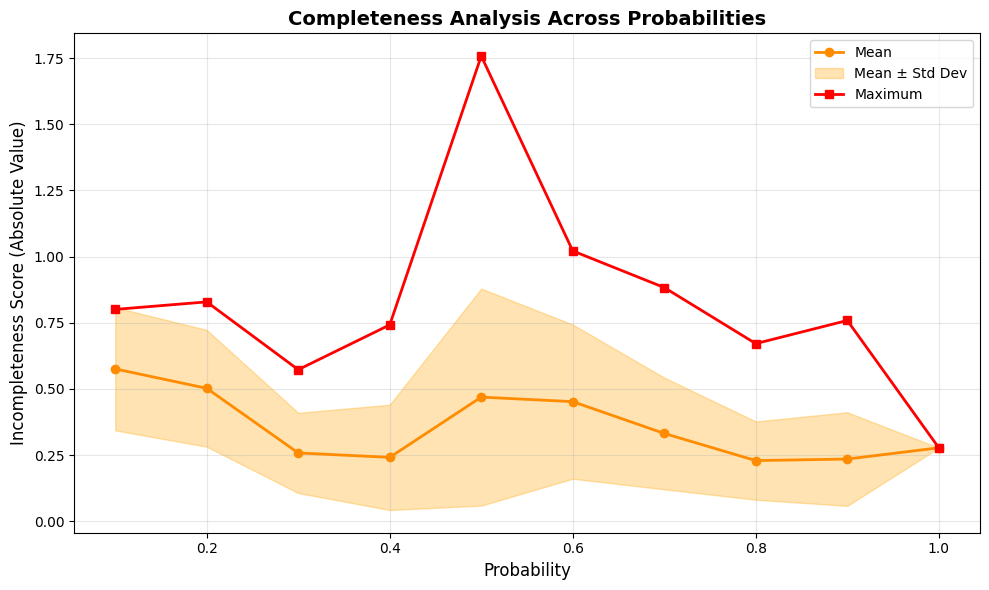

In [13]:
# Define the base file and probabilities to analyze
base_file = 'results/completeness/completeness_BABA_T=0_type=random_num_runs=20_prob=x.json'
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1.0]

# Create the plot
fig, ax = plot_completeness_analysis(base_file, probabilities, abs_value=True)
plt.savefig('plots/completeness_analysis.png', dpi=300)
plt.show()

In [ ]:
# Example: Save the plot
# fig.savefig('plots/completeness_analysis.png', dpi=300, bbox_inches='tight')